In [95]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [96]:
import numpy as np
import pandas as pd
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from glob import glob
import random

os.getcwd()

'/home/vivek/Downloads'

In [97]:
directory = '/home/vivek/Desktop/Sunnybrook Files/TrainingSet'
path = os.listdir(directory)
print(path)

['patient15', 'patient12', 'patient03', '.DS_Store', 'patient07', 'patient13', 'patient08', 'patient11', 'patient16', 'patient02', 'patient14', 'patient09', 'patient06', 'patient10', 'patient04', 'patient01', 'patient05']


In [98]:
all_files = glob(os.path.join(directory,'*','*','*'))

In [99]:
#borrowed this code block from kevin mader on kaggle

all_df = pd.DataFrame(dict(path = all_files))
all_df['folder'] = all_df['path'].map(lambda x: x.split('/')[-2])
all_df['patient'] = all_df['path'].map(lambda x: x.split('/')[-3])
all_df['file_id'] = all_df['path'].map(lambda x: os.path.splitext(os.path.split(x)[1])[0])
all_df['file_ext'] = all_df['path'].map(lambda x: os.path.splitext(x)[1][1:])
all_df['slice'] = all_df['file_id'].map(lambda x: int(x.split('-')[1]))
all_df['size'] = all_df['path'].map(lambda x: os.stat(x).st_size)
all_df['data_type'] = all_df.apply(lambda c_row: 'dcm' if c_row['file_ext']=='dcm' else c_row['file_id'].split('-')[-2],1)
print(all_df.shape[0], all_df.query('size>0', inplace = True), '->', all_df.shape[0])
all_df.sample(10)

4426 None -> 3504


,path,folder,patient,file_id,file_ext,slice,size,data_type
1798,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P11dicom,patient11,P11-0037,dcm,37,112878,dcm
3815,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P04contours-manual,patient04,P04-0120-ocontour-manual,txt,120,9607,ocontour
2794,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P09dicom,patient09,P09-0050,dcm,50,112870,dcm
3153,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P06dicom,patient06,P06-0239,dcm,239,112876,dcm
2797,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P09dicom,patient09,P09-0096,dcm,96,112874,dcm
4106,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P01dicom,patient01,P01-0053,dcm,53,112870,dcm
3670,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P04dicom,patient04,P04-0094,dcm,94,112874,dcm
4036,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P01dicom,patient01,P01-0072,dcm,72,112872,dcm
3966,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P01dicom,patient01,P01-0056,dcm,56,112870,dcm
3882,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,P01dicom,patient01,P01-0140,dcm,140,112872,dcm


In [100]:
#borrowed from kevin mader on kaggle

all_images_df = pd.pivot_table(all_df, 
               columns = 'data_type', 
               values = 'path',
               index = ['patient', 'slice'],
              aggfunc = 'first')#.reset_index()
all_images_df.sample(100)

,data_type,dcm,icontour,ocontour
patient,slice,,,
patient05,84,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient13,84,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient11,187,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient07,183,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient12,19,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient04,0,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient02,237,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient01,27,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
patient09,98,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN


In [101]:
all_images_df.reset_index()

data_type,patient,slice,dcm,icontour,ocontour
0,patient01,0,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
1,patient01,1,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
2,patient01,2,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
3,patient01,3,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
4,patient01,4,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
5,patient01,5,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
6,patient01,6,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
7,patient01,7,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
8,patient01,8,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN
9,patient01,9,/home/vivek/Desktop/Sunnybrook Files/TrainingS...,NaN,NaN


In [102]:
#borrowed from kevin mader on kaggle

#only the parts that are true in between them remain.  we're negative the null value detection.  
#then we do bitwise assignment.
#lets only deal with input contours

valid_pts = all_images_df.icontour.notnull()
#valid_pts &= all_images_df.ocontour.notnull()
valid_pts &= ~all_images_df.dcm.isnull()
labeled_df = all_images_df[valid_pts].copy()
print(labeled_df.shape)
labeled_df.head(100)



(197, 3)


data_type                                                      dcm  \
patient   slice                                                      
patient01 80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          188    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          200    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          208    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          220    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          228    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          240    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient02 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          68     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          88     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
...                                                            ...   
patient05 180    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          190    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          200    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient06 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          68     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          88     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          108    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          128    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          140    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          148    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          160    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          168    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
patient07 40     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          60     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          80     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          87     /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          100    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          107    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          120    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          127    /home/vivek/Desktop/Sunnybrook Files/TrainingS...   
          

In [103]:
from skimage.measure import grid_points_in_poly

def read_contour(in_path):
    c_df = pd.read_table(in_path,sep = '\s+', header=None)
    c_df.columns = ['x', 'y']
    return c_df



[[  4   4   6 ... 261 276 283]
 [  2   3   4 ... 247 264 276]
 [  5   5   4 ... 226 243 260]
 ...
 [ 16  12  12 ...  40  46  41]
 [ 16  11  11 ...  45  59  61]
 [ 17  10  10 ...  38  60  71]]


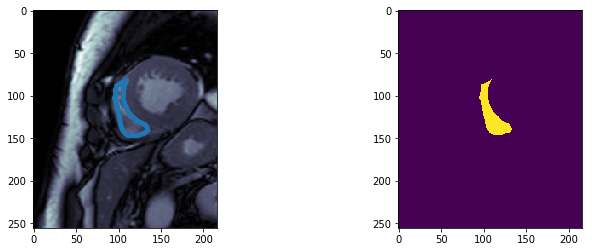

In [104]:
_, t_row = next(labeled_df.sample(1).iterrows())
t_img = dicom.read_file(t_row['dcm']).pixel_array
print(t_img)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))
ax1.imshow(t_img, cmap = 'bone')

i_df = read_contour(t_row['icontour'])
#print(i_df)
ax1.plot(i_df['x'], i_df['y'], '.-', label = 'inner contour')
#ax1.legend()
ax2.imshow(grid_points_in_poly(t_img.shape, i_df[['y', 'x']].values))


In [105]:
#SEE IF CAN CHANGE TO CV2

labeled_df['image'] = labeled_df['dcm'].map(lambda x: dicom.read_file(x).pixel_array)
labeled_df['icontour_pts'] = labeled_df['icontour'].map(read_contour)
#labeled_df['ocontour_pts'] = labeled_df['ocontour'].map(read_contour)
labeled_df['mask'] = labeled_df.apply(lambda c_row: [
    grid_points_in_poly(c_row['image'].shape, c_row['icontour_pts'][['y', 'x']].values)
], 1)

print(labeled_df['mask'][0][0],len(labeled_df['mask'][0][0]))

def crop_copy(in_img, size = (256, 256)):
    out_img = np.zeros(size)
    out_img[0:min(in_img.shape[0], size[0]),
           0:min(in_img.shape[1], size[1])] = in_img[0:min(in_img.shape[0], size[0]),
           0:min(in_img.shape[1], size[1])]
    return out_img
all_img_stack = np.expand_dims(np.stack(labeled_df['image'].map(crop_copy).values,0), -1)
all_mask_icontour = np.expand_dims(np.stack(labeled_df['mask'].map(lambda x: crop_copy(x[0])).values,0), -1)
print(all_img_stack.shape, all_mask_icontour.shape)



[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 256
(197, 256, 256, 1) (197, 256, 256, 1)


In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_img_stack, all_mask_icontour, random_state = 2018, test_size = 0.25)
print(x_train.shape, x_test.shape)


(147, 256, 256, 1) (50, 256, 256, 1)


In [107]:
import keras
from keras import Sequential,Model
from keras.optimizers import Adam,SGD
from keras.layers import Input, Dense, Concatenate, Dropout
from keras.layers import Conv2D, MaxPool2D, Activation, UpSampling2D,Conv2DTranspose, concatenate
from keras.layers.merge import Concatenate
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import skimage.io as io
import skimage.transform as trans
from keras import backend as K
K.set_image_data_format('channels_last')




#first fit very small dataset



inputs = Input(shape = (256,256,1))
#img_input = Input(shape=(channel, img_rows, img_cols))

#First Block
b1_conv1 = Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(inputs)
b1_conv2 = Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(b1_conv1)
b1_pool = MaxPool2D((2,2))(b1_conv2)  #maybe change to pooling
drop1= Dropout(0.2)(b1_pool)

#Second Block
b2_conv1 = Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer = 'glorot_normal')(b1_pool)
b2_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b2_conv1)
b2_pool = MaxPool2D((2,2))(b2_conv2)
drop2= Dropout(0.2)(b2_pool)

#Third Block
b3_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b2_pool)
b3_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b3_conv1)
b3_pool = MaxPool2D((2,2))(b3_conv2)
drop3= Dropout(0.2)(b3_pool)

#Fourth Block
b4_conv1 = Conv2D(512,(3,3),activation='relu',padding='same')(b3_pool)
b4_conv2 = Conv2D(512,(3,3),activation='relu',padding='same')(b4_conv1)
b4_up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b4_conv2)
drop4= Dropout(0.2)(b4_up)


#Fifth Block
b5_concat = concatenate([drop4, b3_conv2], axis=3)
b5_conv1 = Conv2D(256,(3,3),activation='relu',padding='same')(b5_concat)
b5_conv2 = Conv2D(256,(3,3),activation='relu',padding='same')(b5_conv1)
b5_up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(b5_conv2)
drop5= Dropout(0.2)(b5_up)

#Sixth Block
b6_concat = concatenate([drop5, b2_conv2], axis=3)
b6_conv1 = Conv2D(128,(3,3),activation='relu',padding='same')(b6_concat)
b6_conv2 = Conv2D(128,(3,3),activation='relu',padding='same')(b6_conv1)
b6_up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b6_conv2)
drop6= Dropout(0.2)(b6_up)

#Seventh Block
#b7_concat = concatenate([drop6, b1_conv2], axis=3)
#b7_conv1 = Conv2D(64,(3,3),activation='relu',padding='same')(b7_concat)
#b7_conv2 = Conv2D(64,(3,3),activation='relu',padding='same')(b7_conv1)
#b7_up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b7_conv2)
#drop7= Dropout(0.2)(b7_up)

#Output
#do we want only 2 classes?
output_layer1 = Conv2D(2,(3,3),activation='relu',padding='same')(drop6)
output_layer = Conv2D(1,(1,1),activation='sigmoid',padding='same')(output_layer1)


# In[72]:


model = Model(inputs =inputs,outputs=output_layer)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 

In [108]:
from keras import optimizers


smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

adam = optimizers.Adam(lr=0.01)
#adam = optimizers.Adam(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=[dice_coef], loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)


In [109]:
import matplotlib.pyplot as plt

def plot(history, save_path = None, dpi=600):
    plt.figure()
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('dice')

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, validation_split=0.2, verbose=1)

In [ ]:
plot(history)